逻辑回归算法

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

查找文件位置

In [ ]:
path = '..\ex2-logistic regression\ex2data1.txt'
data = pd.read_csv(path,header = None, names = ['Exam 1','Exam 2', 'Admitted'])
data.head()

创建散点图  来实现可视化

In [ ]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s = 50, c = 'b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s = 50, c = 'r', marker='x',label= 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()


定义 一个sigmoid函数 逻辑回归模型的假设函数

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

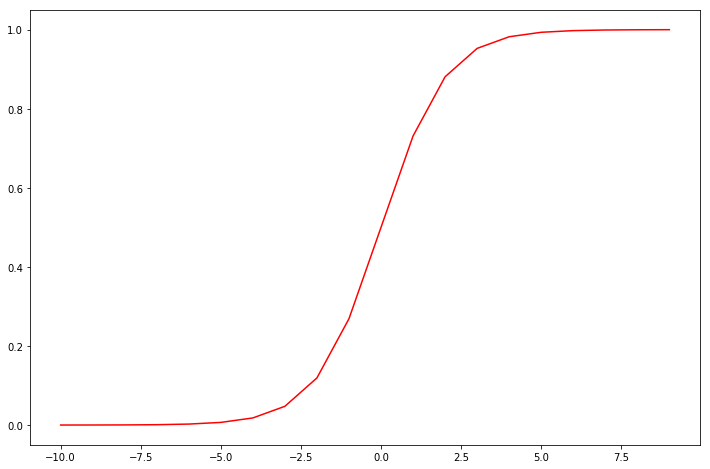

In [5]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

定义 代价函数  

In [6]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second  = np.multiply((1-y), np.log(1-sigmoid(X * theta.T)))
    return np.sum(first-second) / (len(X))

In [7]:
data.insert(0,'ones',1)


cols = data.shape[1]
X = data.iloc[: , 0:cols-1]
y = data.iloc[: , cols-1:cols]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [8]:
theta

array([ 0.,  0.,  0.])

In [9]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [10]:
cost(theta, X, y)

0.69314718055994529

定义梯度下降函数
1.依次先对 参数  进行

In [11]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    paramaters = int(theta.ravel().shape[1])
    grad = np.zeros(paramaters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(paramaters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

In [12]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [13]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [14]:
cost(result[0],X, y)

0.20349770158947425

In [15]:
def perdict(theta, X ):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [19]:
theta_min = np.matrix(result[0])
predictions = perdict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0) )else 0 for (a, b)in zip(predictions, y) ]

accuracy = (sum(map(int, correct))% len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%
